### Diabetes Dataset
##### This is Diabetes dataset. you can use this data set for prediction. in this dataset have many parameters such as Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigree, Age, Outcome.

#### Problem Statement: To predict diabetes in patients using the provided dataset.

#### Dataset Observation: The 'Outcome' column serves as the target variable (y), indicating whether the patient has diabetes (1) or does not have diabetes (0) based on the other feature columns.

#### Task: Create a model using the DecisionTree classifier to predict diabetes in patients using the provided dataset

### Import libraries

In [42]:
import pandas as pd                        #Data manipulation
import numpy as np                         #Numerical computing and array operations
import matplotlib.pyplot as plt            #Data visualization/provide plotting functions
from sklearn import datasets               #sklearn library - Use for classification, regression, clustering, dimensionality reduction etc.


#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split


#import the decisiontree classifier
from sklearn.tree import DecisionTreeClassifier          #DecisionTreeClassifier tasks & plot_tree_visualizing decision trees
from sklearn import tree                                 #decision tree-based models
from sklearn.metrics import classification_report        #evaluating classification model performance   

# for data pre-processing
from sklearn import preprocessing

### Load Dataset

In [43]:
db = pd.read_csv('E:\DScience-22072023\diabetes.csv')

### EDA

In [44]:
db.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [45]:
db.tail(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [46]:
db.index                            # Display the DataFrame.index

RangeIndex(start=0, stop=768, step=1)

In [47]:
db.columns                         # Display the DataFrame Columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [48]:
db.shape                           # Shows the number of rows and columns

(768, 9)

In [49]:
db['Outcome'].value_counts()       # Counting the frequency of unique values in the 'Outcome' column

0    500
1    268
Name: Outcome, dtype: int64

In [50]:
db.info()                            # Generating a concise summary of the DataFrame 'db'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [51]:
db[db.duplicated()].shape             # Check for duplicated rows in the DataFrame

(0, 9)

In [52]:
db_cleaned = db.drop_duplicates()     # New DataFrame 'db_cleaned' by removing duplicated rows from the db DataFrame

In [53]:
db_cleaned.shape                      # Retrieve the dimensions of the new DataFrame

(768, 9)

In [54]:
missing_values = db.isnull().sum()   # Calculate the sum of missing values for each column in the DF
print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [55]:
db.dtypes                            # Obtaining data types of columns in the DataFrame

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [56]:
db.describe()                # Generating descriptive statistics for numerical columns in the DataFrame

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [57]:
db.mean()               # Calculating the mean values for numeric columns in the DataFrame

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [58]:
db.mean(axis=1)          # Calculating the row-wise mean values in the DataFrame

0      38.469667
1      26.550111
2      34.663556
3      35.807444
4      51.043111
         ...    
763    56.785667
764    31.682222
765    43.271667
766    29.494333
767    27.635000
Length: 768, dtype: float64

In [59]:
db.iloc[:,0:9]        #selecting rows from all columns (denoted by :) & columns from index 0 up to index 8 exclusively.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [60]:
x = db.iloc[:,0:8]   # Retrieves columns 0 to 7
y = db.iloc[:, [8]]  # Retrieves column at index position 8 as a DataFrame

In [61]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [62]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


#### Dataset Observation: All columns in this dataset contain numerical values, therefore, there is no need to use a label encoder.

In [63]:
# Splitting the dataset into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=44)

#### Question: I copied and pasted the code above from my practice notebook/code, but how can we determine the test size and random state?"

In [64]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614, 1), (154, 1))

In [65]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
452,0,91,68,32,210,39.9,0.381,25
370,3,173,82,48,465,38.4,2.137,25
746,1,147,94,41,0,49.3,0.358,27
122,2,107,74,30,100,33.6,0.404,23
614,11,138,74,26,144,36.1,0.557,50
...,...,...,...,...,...,...,...,...
131,9,122,56,0,0,33.3,1.114,33
238,9,164,84,21,0,30.8,0.831,32
634,10,92,62,0,0,25.9,0.167,31
731,8,120,86,0,0,28.4,0.259,22


In [66]:
y_test

,Outcome
452,0
370,1
746,1
122,0
614,1
...,...
131,1
238,1
634,0
731,1


#### Building Decision Tree Classifier using Entropy as a Criterion

In [67]:
# Creating a Decision Tree Classifier model with entropy as the criterion and a maximum depth of 2.
model =  DecisionTreeClassifier(criterion='entropy',max_depth = 2)

# Training the model on the training data (x_train: features, y_train: target)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=2)

#### PLot the decsion Tree

[Text(0.5, 0.8333333333333334, 'x[1] <= 127.5\nentropy = 0.917\nsamples = 614\nvalue = [410, 204]'),
 Text(0.25, 0.5, 'x[7] <= 28.5\nentropy = 0.676\nsamples = 382\nvalue = [314, 68]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.414\nsamples = 216\nvalue = [198, 18]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.883\nsamples = 166\nvalue = [116, 50]'),
 Text(0.75, 0.5, 'x[5] <= 29.95\nentropy = 0.978\nsamples = 232\nvalue = [96, 136]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.913\nsamples = 67\nvalue = [45, 22]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.892\nsamples = 165\nvalue = [51, 114]')]

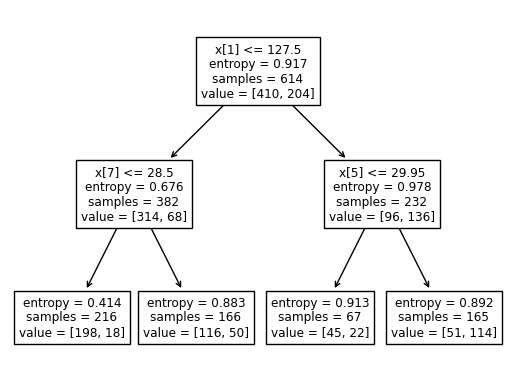

In [68]:
# Plotting the decision tree structure using the plot_tree function.
# Visualizing the structure of the trained decision tree model 'model'.

tree.plot_tree(model)

[Text(0.5, 0.8333333333333334, 'Glucose (cm) <= 127.5\nentropy = 0.917\nsamples = 614\nvalue = [410, 204]\nclass = 1'),
 Text(0.25, 0.5, 'Age (cm) <= 28.5\nentropy = 0.676\nsamples = 382\nvalue = [314, 68]\nclass = 1'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.414\nsamples = 216\nvalue = [198, 18]\nclass = 1'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.883\nsamples = 166\nvalue = [116, 50]\nclass = 1'),
 Text(0.75, 0.5, 'BMI (cm) <= 29.95\nentropy = 0.978\nsamples = 232\nvalue = [96, 136]\nclass = 0'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.913\nsamples = 67\nvalue = [45, 22]\nclass = 1'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.892\nsamples = 165\nvalue = [51, 114]\nclass = 0')]

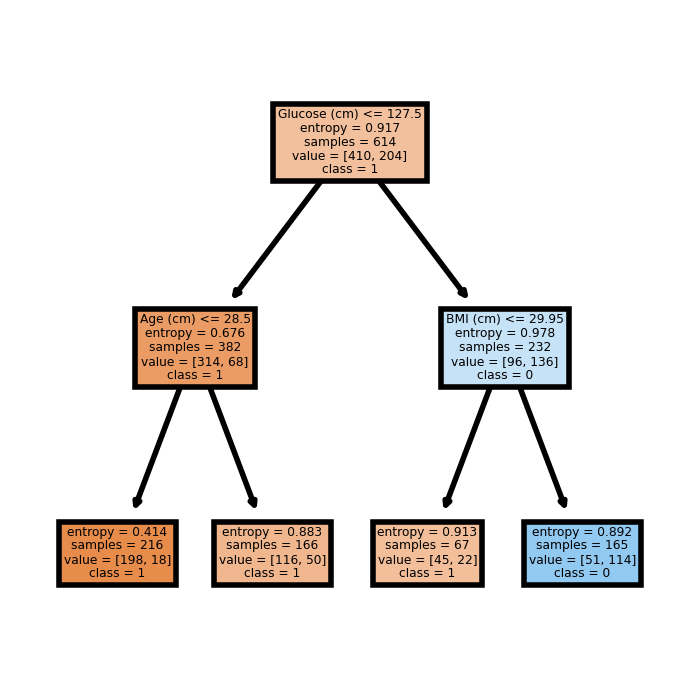

In [70]:
# Defining feature names and class names for visualization.
fn = ['Pregnancies (cm)','Glucose (cm)','BloodPressure (cm)','BloodPressure (cm)','Insulin (cm)','BMI (cm)','DiabetesPedigreeFunction (cm)','Age (cm)']
cn = ['1','0',]


# Creating a figure and axes for plotting the decision tree structure.
# figsize=(2,2) specifies the dimensions of the figure in inches (width, height).
# dpi=400 sets the resolution of the image to 400 dots per inch.

fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(2,2), dpi=400)      


# Visualizing the structure of the trained decision tree model 'model'.
tree.plot_tree(model,feature_names=fn,class_names = cn, filled=True)